# Notebook for Part 1 - Exploration and Preprocessing

In [4]:
# Import Matplotlib and Seaborn for visualization
import matplotlib.pyplot as plt
import numpy as np

# Import Pandas and NumPy functionality for editing data
import pandas as pd
import seaborn as sns

# Importing IPython display for visualizing intermediate results in the notebook
from IPython.display import display

# 1.a) Question: Import the log and give shape

In [5]:
data_path = 'heart_disease_data'

data_raw = pd.read_csv(data_path+'/heart_disease_raw.csv')
data_test = pd.read_csv(data_path+'/test-dataset-oh.csv')
data_train = pd.read_csv(data_path+'/train_dataset.csv')

## 1.b) Question Basic Statistics

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


0.9956521739130435
1.142072205464818
1.0


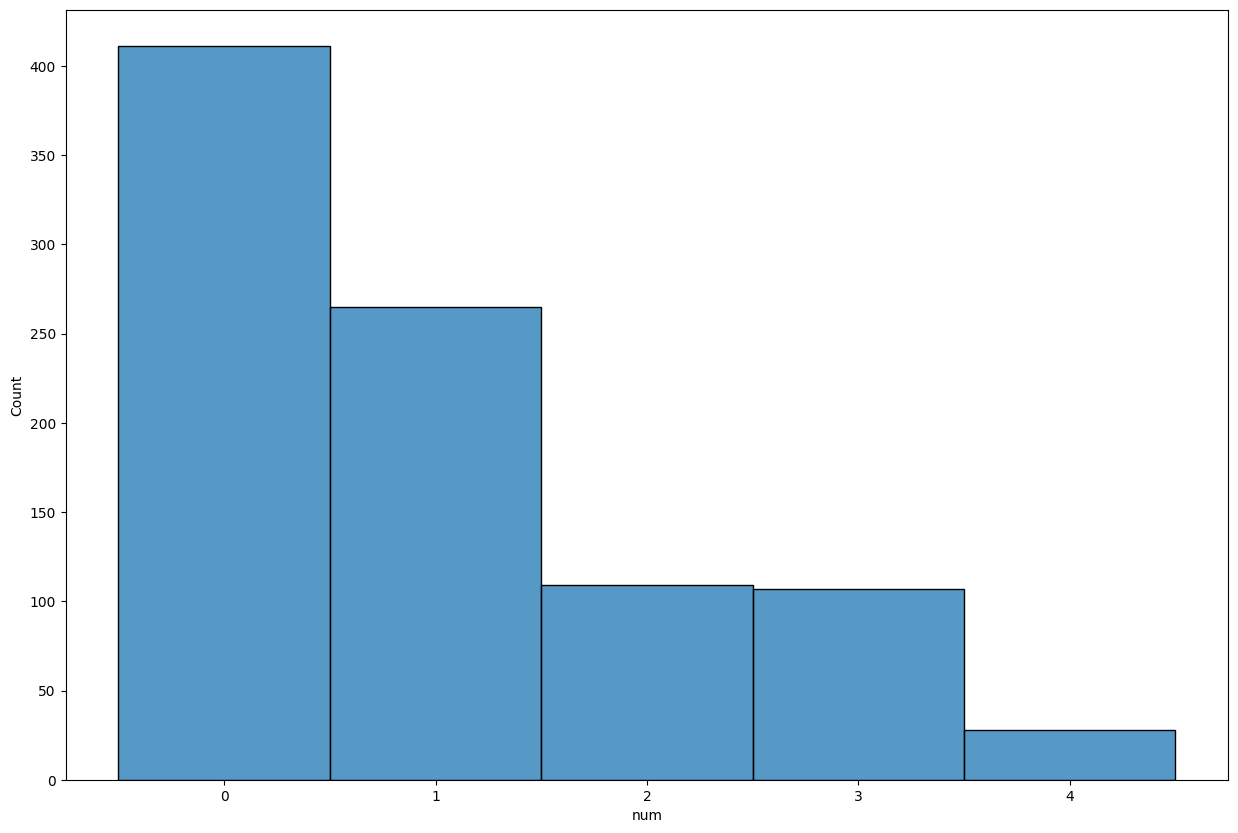

In [6]:
display(data_raw)
display(data_raw.describe())
plt.figure(figsize=(15,10))
sns.histplot(data=data_raw, x='num', discrete=True)
print(np.mean(data_raw["num"]))
print(np.std(data_raw["num"]))
print(np.median(data_raw["num"]))

## 1.c) Question about the interpretation of mean of num
(no code)

The mean of 'num' is 0.99 with an std of 1.14 suggesting that most of of the entries are ones and zeros????

## 1.d) Question: Class imbalance female, male

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,194.000000,194.000000,192.000000,187.000000,192.000000,193.000000,97.000000,194.000000
mean,316.618557,52.474227,132.093750,241.481283,146.244792,0.668394,0.546392,0.422680
std,194.518427,9.496214,19.509202,86.291226,22.193048,0.957202,0.878216,0.849688
min,5.000000,30.000000,94.000000,0.000000,90.000000,0.000000,0.000000,0.000000
25%,173.250000,46.000000,120.000000,204.000000,130.000000,0.000000,0.000000,0.000000
50%,304.500000,53.000000,130.000000,244.000000,150.000000,0.000000,0.000000,0.000000
75%,428.750000,60.000000,140.000000,291.000000,163.000000,1.100000,1.000000,1.000000
max,916.000000,76.000000,200.000000,564.000000,192.000000,6.200000,3.000000,4.000000


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,726.000000,726.000000,669.000000,703.000000,673.000000,665.000000,212.000000,726.000000
mean,498.947658,53.787879,132.143498,187.864865,135.063893,0.939850,0.735849,1.148760
std,269.094564,9.392685,18.951807,113.858400,26.390166,1.120425,0.956909,1.162597
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,269.250000,47.000000,120.000000,156.500000,117.000000,0.000000,0.000000,0.000000
50%,535.500000,55.000000,130.000000,220.000000,135.000000,0.600000,0.000000,1.000000
75%,732.750000,60.000000,140.000000,263.000000,154.000000,1.800000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,5.600000,3.000000,4.000000


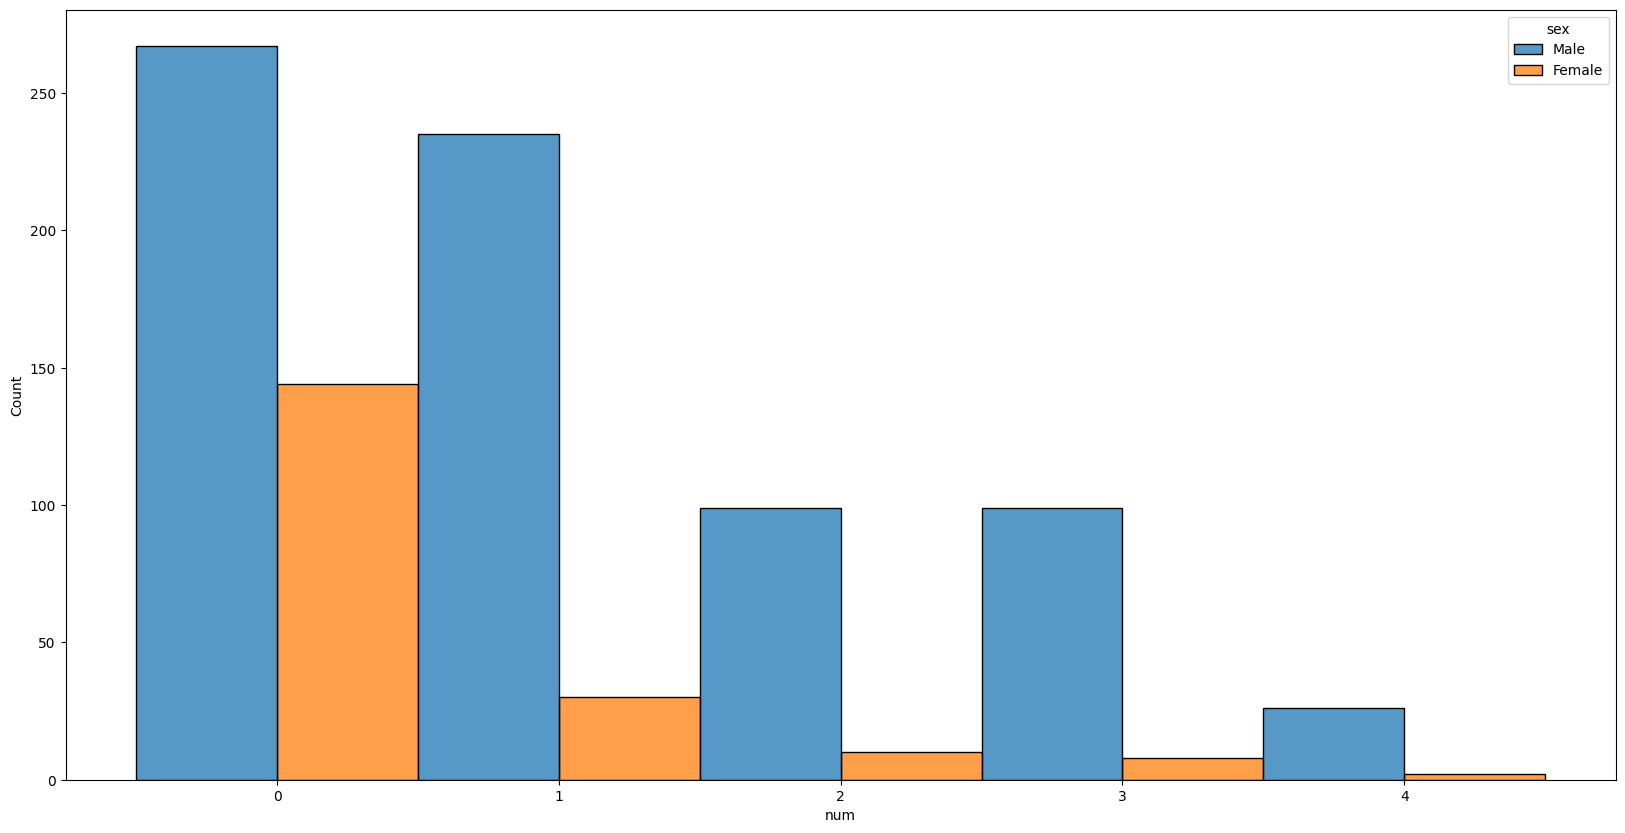

'\nas one can see there is a lot less data on females than on males, this could indicate a flaw in the way the candidates where selected.\nbut even from the smaller smaple size one can see the differentce, as for the female dataset the mean and median is lower and \ncategory 4 conditions are even considered outliers concidering gd (see boxplot)\n'

In [7]:
df_male = data_raw[data_raw['sex'] == 'Male']
df_female = data_raw[data_raw['sex'] == 'Female']
display(df_female.describe())
display(df_male.describe())
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(data=data_raw, x='num', discrete=True,hue='sex',multiple="dodge")
plt.show()
'''
as one can see there is a lot less data on females than on males, this could indicate a flaw in the way the candidates where selected.
but even from the smaller smaple size one can see the differentce, as for the female dataset the mean and median is lower and 
category 4 conditions are even considered outliers concidering gd (see boxplot)
'''
# fig, ax = plt.subplots(figsize=(20,10))
# ax.boxplot([df_female,df_male],0,"gd",patch_artist=True)
# plt.xticks([1, 2], ['Female', 'Male'])

## 1.e) Question: Distribution target feature

726


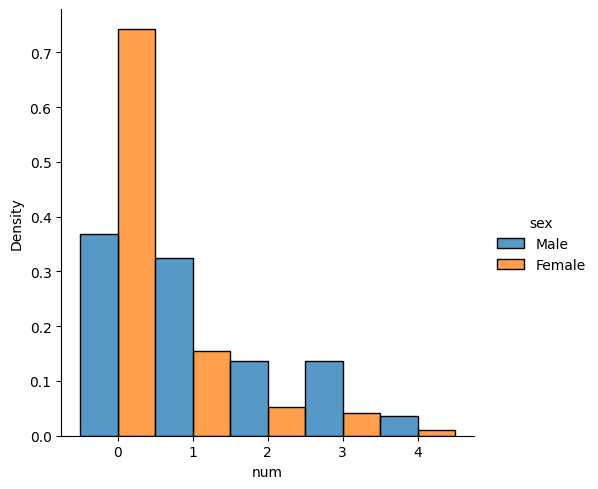

In [8]:
print(data_raw[data_raw["sex"]=="Male"]["num"].count())
lol = int(data_raw[data_raw["sex"]=="Male"]["num"].count())
mem = int(data_raw[data_raw["sex"]=="Female"]["num"].count())
sns.displot(data_raw, x='num' ,hue="sex",kind="hist", multiple="dodge", stat="density",discrete=True, common_norm=False) #?????????
# sns.displot(data_raw[data_raw["sex"]=="Female"], x='num' ,hue="sex",discrete=True,stat="density")
# sns.displot(data_raw, x='num' ,discrete=True,stat="density")
# plt.scatter(data_raw["num"],data_raw["age"])



## 1.f) Question: Binning

In [9]:
#keine ahnung, sollen wir einfach alle features mit nem hist/bar plot machen und dann gedanken übers binning machen? oder nur num 

## 1.g) Question: Correlation

                 num  sex_Female  sex_Male
num         1.000000   -0.259342  0.259342
sex_Female -0.259342    1.000000 -1.000000
sex_Male    0.259342   -1.000000  1.000000


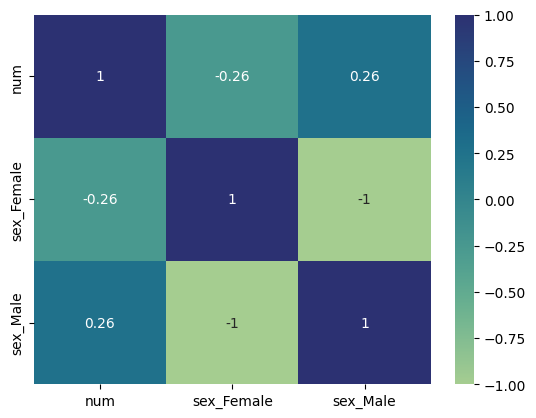

In [ ]:

''' some testing '''
# sns.pairplot(data_raw)


#corr-matrix
data_tmp = pd.get_dummies(data_raw[["sex","num"]])
# corr_matrix = data_tmp.corr(numeric_only=True)
corr_matrix = data_tmp.corr()
print(corr_matrix)
dataplot = sns.heatmap(corr_matrix ,cmap="crest",annot=True) 


## 1.h) Question: Correlation

## 1.i) Question Boxplot Interpretation
(no code)

## 1.j) Question: NANs per feature

In [11]:
print("number of NaN values per Feature: \n",data_raw.isna().sum(axis=0))


number of NaN values per Feature: 
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


## 1.k) Question: Simple Remove NaNs

In [12]:
data_clean = data_raw.dropna()
display(data_raw.describe())
display(data_clean.describe())# da fällt viel weg hmm 

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,153.872910,54.521739,131.715719,246.785953,149.327759,1.058528,0.672241,0.946488
std,95.896287,9.030264,17.747751,52.532582,23.121062,1.162769,0.937438,1.230409
min,1.000000,29.000000,94.000000,100.000000,71.000000,0.000000,0.000000,0.000000
25%,75.500000,48.000000,120.000000,211.000000,132.500000,0.000000,0.000000,0.000000
50%,151.000000,56.000000,130.000000,242.000000,152.000000,0.800000,0.000000,0.000000
75%,227.500000,61.000000,140.000000,275.500000,165.500000,1.600000,1.000000,2.000000
max,749.000000,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000
